In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator,image,img_to_array,load_img
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import cv2 # image processing


from tensorflow.keras.utils import to_categorical
import seaborn as sns

from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop

ImportError: cannot import name 'image' from 'tensorflow.keras.preprocessing.image' (/Users/aizen741/miniforge3/envs/dataScienceEnv/lib/python3.8/site-packages/tensorflow/python/keras/api/_v2/keras/preprocessing/image/__init__.py)

In [69]:
import tensorflow as tf
print(tf.__version__)

2.4.0-rc0


In [70]:
IMAGE_SIZE = [224, 224]
training_path = '/Users/aizen741/Desktop/PneumoniaDetect/dataset/train'
testing_path = '/Users/aizen741/Desktop/PneumoniaDetect/dataset/val'


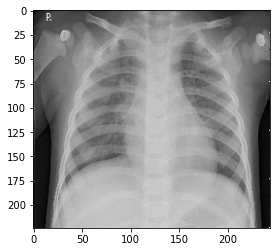

In [71]:
img = image.load_img('/Users/aizen741/Desktop/PneumoniaDetect/dataset//train/PNEUMONIA/person1_bacteria_2.jpeg', target_size = (224,244))

plt.imshow(img)

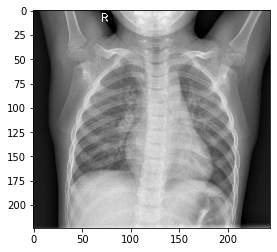

In [72]:
imgg = image.load_img('/Users/aizen741/Desktop/PneumoniaDetect/dataset/train/NORMAL/IM-0115-0001.jpeg', target_size = (224,244))

plt.imshow(imgg)

### For Training DataSet

## Lets initialize the required Transfer learning models for this project

include_top = False <--- I used this here so that this can cut the first and last layer , because in first layer we will give our own image size and in last layer we will say that how many number of classes should be there.

Till the flatten layer everything is cut

In [73]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagene = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)

In [74]:
training_set = train_datagene.flow_from_directory('/Users/aizen741/Desktop/PneumoniaDetect/dataset/train',
                                                  target_size = (224,224),
                                                  batch_size = 32,
                                                  class_mode = 'categorical',
                                                 shuffle = False)


Found 5216 images belonging to 2 classes.


In [75]:
test_datagene = ImageDataGenerator(rescale=1./255)

In [76]:
testing_set = test_datagene.flow_from_directory('/Users/aizen741/Desktop/PneumoniaDetect/dataset/test',
                                                  target_size = (224,224),
                                                  batch_size = 32,
                                                  class_mode = 'categorical',
                                               shuffle = False)

Found 624 images belonging to 2 classes.


In [77]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet',include_top=False)

- vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet',include_top=False)

- inceptionV3 = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet',include_top=False)

- resnet50 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet',include_top=False)

## Lets Start With VGG16

In [78]:
# Summary will gives u an overview about the model
vgg16.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

we are not training every layer that why I kept the layer.trainable = false

In [79]:
for layer in vgg16.layers:
    layer.trainable = False

In [80]:
folders = glob('/Users/aizen741/Desktop/PneumoniaDetect/dataset/train/*')
folders

['/Users/aizen741/Desktop/PneumoniaDetect/dataset/train/PNEUMONIA',
 '/Users/aizen741/Desktop/PneumoniaDetect/dataset/train/NORMAL']

In [81]:
input_dir = "/Users/aizen741/Desktop/PneumoniaDetect/dataset/"
train_dir = input_dir +"train/"
test_dir = input_dir +"test/"
val_dir = input_dir +"val/"

In [95]:
test_data = []
test_labels = []
label = 0
for cond in ['NORMAL/', 'PNEUMONIA/']:
        for img in (os.listdir(test_dir + cond)):
            img = plt.imread(test_dir+cond + img)
            img = np.dstack([img, img, img])
            img = img.astype('float32') / 255
            if cond=='/NORMAL/':
                label = 0
            elif cond=='/PNEUMONIA/':
                label = 1
            test_data.append(img)
            test_labels.append(label)
        
test_data = np.array(test_data)
test_labels = np.array(test_labels)


we will flatten what we got in summary

In [83]:
x = Flatten()(vgg16.output)

In the dense layer there will be 2 nodes.

In [84]:
prediction = Dense(len(folders), activation='softmax')(x)

#creating a model object here now

model = Model(inputs = vgg16.input,
              outputs = prediction)

In [85]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

## Compile the model

In [86]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [87]:
history = model.fit(
  training_set,
    validation_data=testing_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(testing_set)
)
                                

Epoch 1/5
163/163 [==============================] - 224s 1s/step - loss: 1.4114 - accuracy: 0.7243 - val_loss: 0.3348 - val_accuracy: 0.8734
Epoch 2/5
163/163 [==============================] - 231s 1s/step - loss: 0.2166 - accuracy: 0.9221 - val_loss: 0.7961 - val_accuracy: 0.7965
Epoch 3/5
163/163 [==============================] - 229s 1s/step - loss: 0.2178 - accuracy: 0.9327 - val_loss: 0.3587 - val_accuracy: 0.9054
Epoch 4/5
163/163 [==============================] - 229s 1s/step - loss: 0.1619 - accuracy: 0.9404 - val_loss: 0.7213 - val_accuracy: 0.8141
Epoch 5/5
163/163 [==============================] - 229s 1s/step - loss: 0.2031 - accuracy: 0.9343 - val_loss: 0.4976 - val_accuracy: 0.8958


In [88]:
result  = model.evaluate(testing_set,steps=len(testing_set))
print('Loss:', result[0])
print('Accuracy:', result[1])

20/20 [==============================] - 24s 1s/step - loss: 0.4976 - accuracy: 0.8958
Loss: 0.49756431579589844
Accuracy: 0.8958333134651184


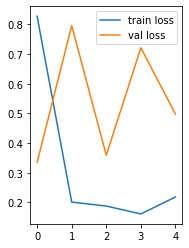

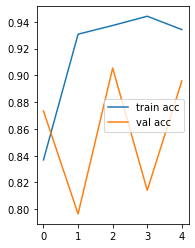

In [89]:
# plot the loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')

plt.legend()
plt.show()
# plot the accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()

plt.show()


In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix
preds = model.predict(test_data)

acc = accuracy_score(test_labels, np.round(preds),normalize=False)*100
cm = confusion_matrix(test_labels, np.round(preds))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX')
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()
# print(cm)
'''
print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
sensitivity = recall
specificity = tn/(tn+fp)*100
print('Accuracy: {}%'.format(acc))
print("Precision : How many of those who we labeled as having pneumonia are actually having pneumonia?")
print('Precision: {}%'.format(precision))
print('Recall:  Of all the people who are having pneumonia, how many of those we correctly predict?')
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))
print("Specificity: Of all the people who are normal, how many of those did we correctly predict?")
print('Specificity: {}%'.format(specificity))
print('Sensitivity: {}%'.format(recall))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((history.history['acc'][-1])*100, 2)))

'''

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).